<a href="https://colab.research.google.com/github/Nmane1612/Nihar-Mane/blob/master/Stock%20Market%20Analysis%20%26%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Stock Market Analysis & Prediction (Data Warehousing & Mining project)***

In [1]:
#Libraries To Be Imported
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Geting Stock Data 
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2019-12-12')
#Showing Stock Data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2019-12-06,67.750000,66.824997,66.870003,67.677498,106075600.0,66.997925
2019-12-09,67.699997,66.227501,67.500000,66.730003,128042400.0,66.059944
2019-12-10,67.517502,66.464996,67.150002,67.120003,90420400.0,66.446022


In [3]:
#Getting Number Of Rows & Columns From The Data
df.shape

(2000, 6)

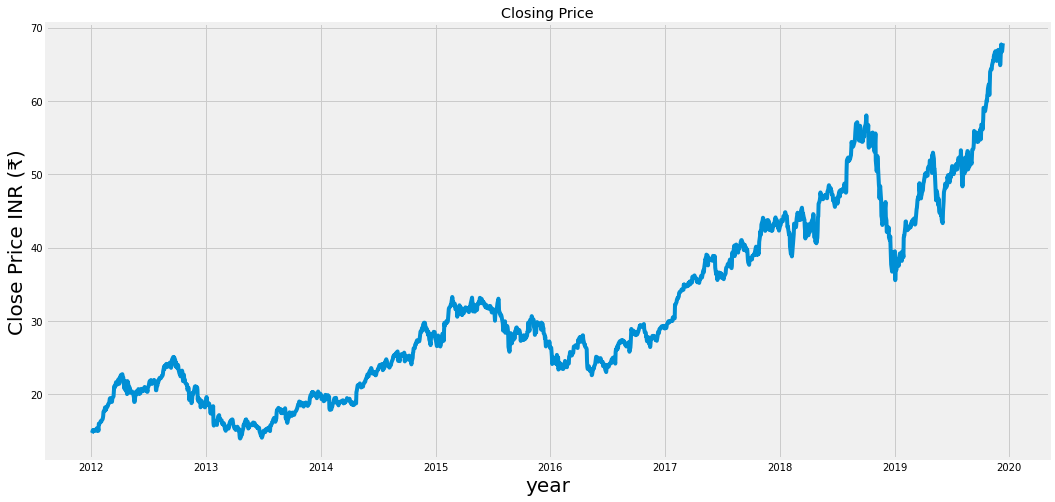

In [4]:
#Visualise Closing Price
plt.figure(figsize=(16,8))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('year', fontsize = 20)
plt.ylabel('Close Price INR (₹)', fontsize = 20)
plt.show()

In [5]:
#Creating Close Column DataFrame
data = df.filter(['Close'])
#Convert The DataFrame To A Numpy Array
dataset = data.values
#Get Number Of Rows To Train The Model On
training_data_len = math.ceil(len(dataset)*.9)
training_data_len

1800

In [6]:
#Scaling Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01371142],
       [0.01517529],
       [0.01821565],
       ...,
       [0.98618268],
       [0.99680066],
       [1.        ]])

In [7]:
#Creating Trained Data Set
#Creating Scaled Training Data Set
train_data = scaled_data[0:training_data_len , :]
#Splitting Data Into x_train & y_train Data Sets
x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.01371142, 0.01517529, 0.01821565, 0.02111029, 0.02066649,
       0.02166669, 0.02120964, 0.02044127, 0.0193947 , 0.02263378,
       0.02555492, 0.02465407, 0.01971926, 0.02442885, 0.01979214,
       0.03717981, 0.03583518, 0.0375905 , 0.04138597, 0.04368445,
       0.04349236, 0.04278362, 0.0458041 , 0.04864573, 0.05186496,
       0.0570647 , 0.06798747, 0.06815306, 0.0742338 , 0.07877776,
       0.07096823, 0.07397545, 0.07391584, 0.08234805, 0.0811491 ,
       0.08336809, 0.08735567, 0.08957469, 0.09596673, 0.10062329,
       0.10196794, 0.10243825, 0.09447637, 0.09255542, 0.09284026,
       0.10032525, 0.10243164, 0.10695575, 0.11762017, 0.13184827,
       0.12918546, 0.12919208, 0.13947897, 0.1426982 , 0.1404063 ,
       0.13831318, 0.13613392, 0.14337379, 0.14834173, 0.15042162])]
[0.1452814791071425]



In [8]:
#Convert x_train & y_train Dataset To Numpy Arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshaping Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1740, 60, 1)

In [10]:
#Building Long Short-Term Memory(LSTM) Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compiling The Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Training The Model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1740/1740 [==============================] - 43s 23ms/step - loss: 0.0031


In [13]:
#Create Testing Dataset
#Create New Array Containing Scaled Values From index 1740 To 2000
test_data = scaled_data[training_data_len - 60: , :]
#Now Creating Data Sets x_test & y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [14]:
#Converting The Data Into A Numpy Array
x_test = np.array(x_test)

In [15]:
#Reshaping The Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#Get Models Predicted Price Values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
#Get The Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.6455888557434082

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


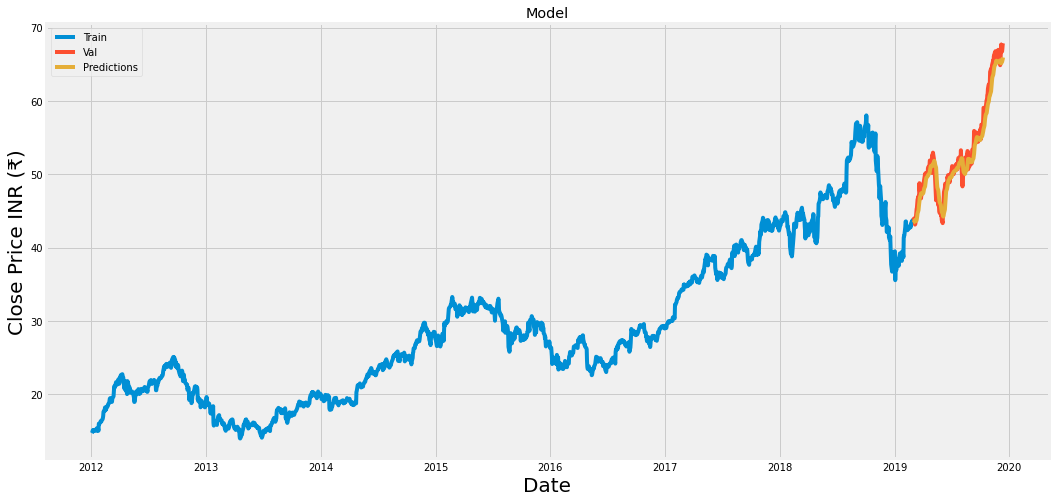

In [18]:
#Plot The Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualizing The Data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price INR (₹)', fontsize = 20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [19]:
#Show The Valid & Predicted Prices
valid

,Close,Predictions
Date,,
2019-03-01,43.742500,43.365589
2019-03-04,43.962502,43.464024
2019-03-05,43.882500,43.582130
2019-03-06,43.630001,43.686035
2019-03-07,43.125000,43.739727
...,...,...
2019-12-06,67.677498,65.120712
2019-12-09,66.730003,65.324890
2019-12-10,67.120003,65.484550


In [20]:
#Get Quote
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2019-12-12')
#Create New Dataframe
new_df = apple_quote.filter(['Close'])
#Get The Last 60 Day Closing Price Values & Convert The DataFrame To An Array
last_60_days = new_df[-60:].values
#Scale The Data To Be Values Between 0 & 1
last_60_days_scaled = scaler.transform(last_60_days)
#Creating An Empty List
X_test = []
#Append Past 60 Days
X_test.append(last_60_days_scaled)
#Convert X_test Data Set To A Numpy Array
X_test = np.array(X_test)
#Reshape The Data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get Predicted Scaled Price
pred_price = model.predict(X_test)
#Undo Scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[66.18459]]


In [21]:
#Get Real Quote
apple_quote1 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-12', end='2019-12-12')
print(apple_quote1['Close'])

Date
2019-12-12    67.864998
Name: Close, dtype: float64
